## Problem Statement: 
Given performance with time for some values, create a model to predict performance for unknown time values

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Section 1: Load and Visualise the data
- Load
- Visualise
- Normalize

In [2]:
# Load
X = pd.read_csv('./Training Data/Linear_X_Train.csv')
Y = pd.read_csv('./Training Data/Linear_Y_Train.csv')

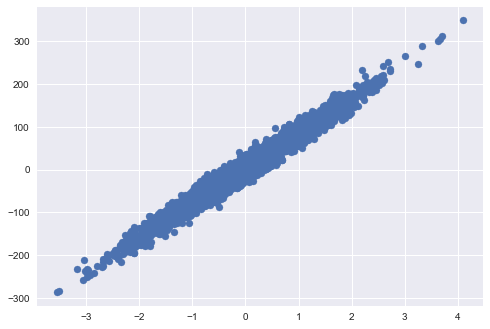

In [3]:
# Visualize
plt.style.use('seaborn')
plt.scatter(X, Y)
plt.show()

In [4]:
print(X.shape, Y.shape)

(3750, 1) (3750, 1)


In [5]:
# Covert X and Y to numpy array
X = X.values
Y = Y.values

In [6]:
# Normalize (normalization is always done on the X values and not on the Y values)
u = X.mean()
std = X.std()

In [7]:
print(u, std)

-0.03779466168006854 0.9920801322508517


Since standard deviation is close to 1, the data is already normalized, still we can apply the formula to normalize it further

In [8]:
X = (X - u)/std

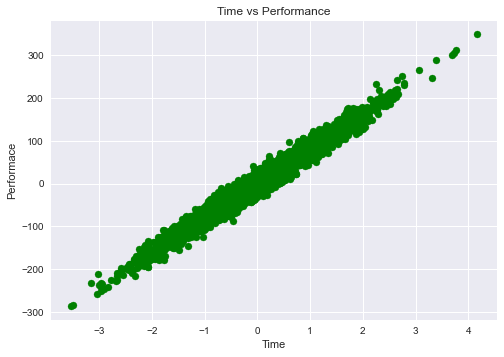

In [9]:
plt.scatter(X, Y, color='green')
plt.title('Time vs Performance')
plt.xlabel('Time')
plt.ylabel('Performace')
plt.show()

This is a linear regression problem as with time spent, performace is increasing

## Section 2: Linear Regression

In [10]:
# theta = [theta0, theta1]
def hypothesis(x, theta):
    y_hat = theta[0] + theta[1]*x
    return y_hat

In [11]:
# computes grad[0] and grad[1]
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_hat = hypothesis(x, theta)
        y = Y[i]
        grad[0] += (y_hat - y)
        grad[1] += (y_hat - y)*x
    return grad/m

In [13]:
def error(X, Y, theta):
    m = X.shape[0]
    totalError = 0.0
    for i in range(m):
        y_hat = hypothesis(X[i], theta)
        totalError += (y_hat - Y[i])**2
    return totalError/m 

In [18]:
def gradientDescent(X, Y, maxSteps = 100, learningRate = 0.1):
    theta = np.zeros((2,))
    errorList = []
    for i in range(maxSteps):
        # Compute gradient
        grad = gradient(X, Y, theta)
        # Compute error
        err = error(X, Y, theta)
        errorList.append(err)
        # Update Theta
        theta[0] = theta[0] - learningRate * grad[0]
        theta[1] = theta[1] - learningRate * grad[1]
    return theta, errorList

In [19]:
theta, errorList = gradientDescent(X, Y)

In [20]:
theta

array([ 0.6838508 , 79.90361453])

In [21]:
errorList

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

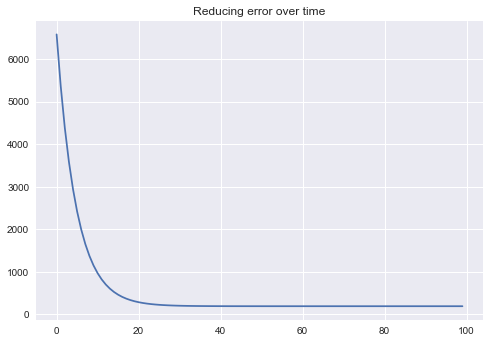

In [24]:
plt.plot(errorList)
plt.title("Reducing error over time")
plt.show()

## Section 3: Predictions and Best Line

In [25]:
y_hat = hypothesis(X, theta)
print(y_hat)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


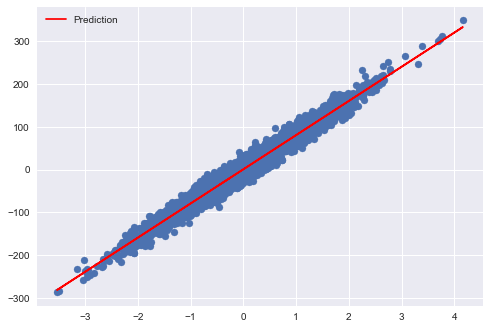

In [30]:
# plotting training data and predictions
plt.scatter(X, Y)
plt.plot(X, y_hat, color = 'red', label="Prediction")
plt.legend()
plt.show()

In [31]:
# Loading the test data
x_test = pd.read_csv('./Test Cases/Linear_X_Test.csv')
y_test = hypothesis(x_test, theta)